# 1번 - 노래 가사를 이용한 장르 분류

## 데이터 설명
- Country, Jazz, Pop, R&B, Rock 총 5개의 category
- 각 category마다 약 800~900개의 가사 데이터 제공
- 파일은 Song(노래제목), lyrics(가사), genre(장르)로 구성됨
- 노래 lyrics(가사) 데이터를 사용하여 genre(장르) 분류를 하고자 합니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

- lyrics_train.csv, lyrics_test.csv 파일을 불러오고 'lyrics'를 피처 데이터, 'genre'를 target 데이터로 정의해주세요

In [11]:
train = pd.read_csv("lyrics_train.csv")
test = pd.read_csv("lyrics_test.csv", encoding='CP949')
test.head()

,song,lyrics,genre
0,checkers-chess,(Chorus) I'm playing Checkers while they're pl...,Country
1,you-re-not-home-yet,If you've got two or three minutes well I'd li...,Country
2,it-don-t-take-much,Just a high school kid with a strong arm From ...,Country
3,come-next-year,Beyond the months of darkness Springtime sleep...,Country
4,hello-i-m-a-truck,HELLO I'M A TRUCK (Bob Stanton) '71 Central So...,Country


In [12]:
x_train=train['lyrics']
y_train=train['genre']
x_test=test['lyrics']
y_test=test['genre']

- TF-IDF Vectorization(파라미터 모두 디폴트로 적용) 적용하여 학습 데이터셋과 테스트 데이터 셋 변환을 수행한 뒤, LogisticRegression을 이용하여 학습/예측/평가를 수행하세요 

In [16]:
tfidf_vect=TfidfVectorizer()
tfidf_vect.fit(x_train)
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)


In [20]:
# logisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train_tfidf_vect, y_train)
pred=lr_clf.predict(x_test_tfidf_vect)
print('예측정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

예측정확도는 0.403


- pipeline, gridsearch를 사용하여 모델 최적화를 수행한 뒤, 최적의 파라미터와 예측 정확도 값을 출력해주세요
- pipeline : TfidfVectorizer 와 LogisticRegression 으로 구성
- 파라미터 후보 :<br> - TfidfVectorizer<br>
  {'ngram_range': [(1,1),(1,3)],<br> 'max_df': [100,700]} <br>- LogisticRegression<br> {'C': [1,10] }
- cv=3 , scoring='accuracy',n_jobs=-1으로 gridsearch 수행 
- 시간이 조금 오래 걸릴 수도 있기에(5~6분) 돌려놓고 밑에 코드 짜는 것을 추천드립니다


In [41]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])
     
params = {'tfidf_vect__ngram_range':[(1,1),(1,3)],
         'tfidf_vect__max_df':[100,700],
         'lr_clf__C':[1,5,10]}
     
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy',n_jobs=-1)
grid_cv_pipe.fit(x_train, y_train)

pred=grid_cv_pipe.predict(x_test)
print('예측정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


예측정확도는 0.426


- (보너스 문제) 비타민에서 그 동안 배운 다양한 분류모델과 텍스트 전처리 기법, 파라미터 최적화 방법들을 자유롭게 사용하여 모델의 성능을 높여주세요
- 필수 문항 아니니 해보고 싶은 분들만 하셔도 됩니다!

# 2번 - 노래 군집화

- 이번에는 노래 가사 데이터를 활용하여 노래 군집화를 수행하고자 합니다.(1번과 데이터 동일)
- word_tokenize와 lemmatize를 순차적으로 수행하는 tokenize_and_lemmatize 함수를 만들어주세요

In [55]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar=WordNetLemmatizer()

def tokenize_and_lemmatize(data):
    tokens = nltk.word_tokenize(data.lower().translate(remove_punct_dict))
    return [lemmar.lemmatize(token) for token in tokens]


- TF-IDF Vectorization 적용하여 학습 데이터셋(X_train)변환을 수행하세요
- TF-IDF Vectorization 파라미터 : tokenizer=tokenize_and_lemmatize, stop_words='english',ngram_range=(1,2), min_df=0.05, max_df=0.85 
- 밑에 시각화 코드와의 연동을 위해 변환된 학습 데이터셋의 이름을 X_train_tfidf_vect으로 지정해주세요

In [56]:
tfidf_vect=TfidfVectorizer(tokenizer=tokenize_and_lemmatize, stop_words='english',ngram_range=(1,2), min_df=0.05, max_df=0.85)

X_train_tfidf_vect = tfidf_vect.fit_transform(x_train)

C:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


- KMeans(n_clusters=5, max_iter=1000)를 사용하여 5개 장르에 대해 군집화를 수행하고 cluster label과 center를 설정하세요
  (밑에 시각화 코드와의 연동을 위해 cluster_label, cluster_centers 이름으로 설정해주세요)

In [57]:
from sklearn.cluster import KMeans


km_cluster = KMeans(n_clusters=5, max_iter=1000)
km_cluster.fit(X_train_tfidf_vect)
cluster_label = km_cluster.labels_

cluster_centers = km_cluster.cluster_centers_

- 군집화 수행한 결과를 pca를 사용하여 시각해보겠습니다(코드 돌려서 군집화가 잘 되었는지 확인만 해보면 됩니다)

C:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


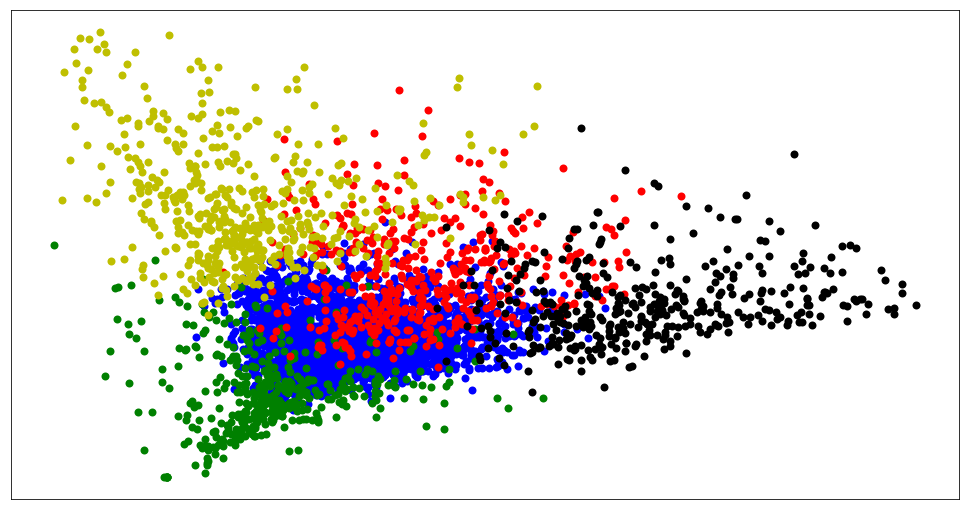

In [59]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

clusters = km_cluster.labels_.tolist()
labels = y_train

colors = {0: 'b', 1: 'g', 2: 'r', 3: 'y', 4:'k'}

pca = PCA(n_components=2).fit_transform(X_train_tfidf_vect.toarray())
xs, ys = pca[:, 0], pca[:, 1]
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
colors = {0: 'b', 1: 'g', 2: 'r', 3: 'y', 4:'k'}

# df = pd.DataFrame(dict(x=xs, y=ys, label=labels))
# colors = {'Country': 'b', 'Jazz': 'g', 'Pop': 'r', 'R&B': 'y', 'Rock':'k'}

groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.05) 

for idx, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
            color=colors[idx], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')
    
plt.show() 

- 위의 군집화 과정을 k=3(군집개수 3)으로 똑같이 반복하고 시각화까지 진행해주세요


In [60]:
km_cluster = KMeans(n_clusters=3, max_iter=1000)
km_cluster.fit(X_train_tfidf_vect)
cluster_label = km_cluster.labels_

cluster_centers = km_cluster.cluster_centers_

C:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


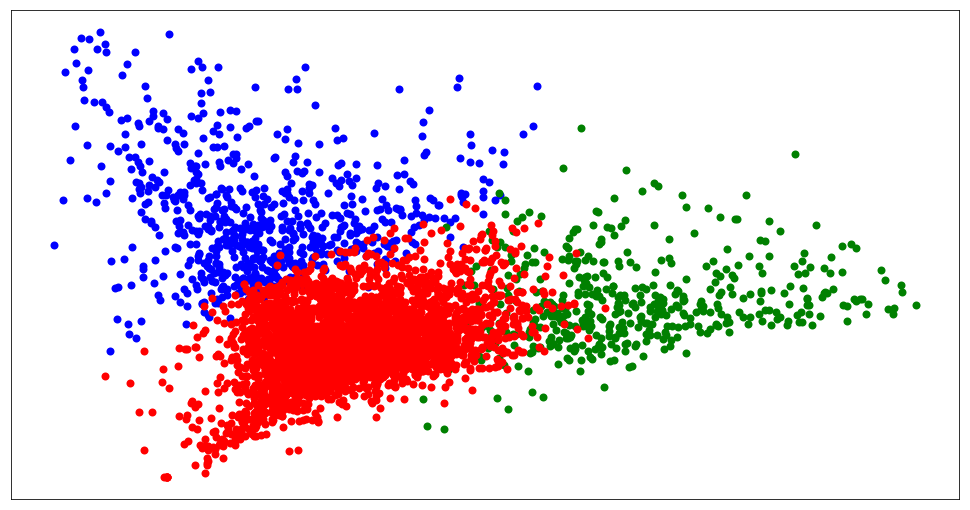

In [61]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

clusters = km_cluster.labels_.tolist()
labels = y_train

colors = {0: 'b', 1: 'g', 2: 'r', 3: 'y', 4:'k'}

pca = PCA(n_components=2).fit_transform(X_train_tfidf_vect.toarray())
xs, ys = pca[:, 0], pca[:, 1]
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
colors = {0: 'b', 1: 'g', 2: 'r', 3: 'y', 4:'k'}

# df = pd.DataFrame(dict(x=xs, y=ys, label=labels))
# colors = {'Country': 'b', 'Jazz': 'g', 'Pop': 'r', 'R&B': 'y', 'Rock':'k'}

groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.05) 

for idx, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
            color=colors[idx], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')
    
plt.show() 

# 3번 - 토픽모델링

- fetch_20newsgroups 데이터를 이용하여 토픽모델링을 수행하고자 합니다
- 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med' 4가지 카테고리에 해당하는 데이터를 불러와주세요
- 불러온 데이터에 CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))를 적용하고 CountVectorizer Shape를 출력하세요

In [34]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [35]:
cats=['talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

news_df=fetch_20newsgroups(subset='all', remove=('headers','footers','guotes'),
                          categories=cats, random_state=0)

count_vect=CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print(feat_vect.shape)

(3911, 1000)


- LDA모델을 학습한 후, Topic별 가장 연관도가 높은 word를 15개씩 출력해주세요

In [42]:
from sklearn.decomposition import LatentDirichletAllocation


lda=LatentDirichletAllocation(n_components=4, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [43]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

        
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
know don like just time use people writes good said does ve want edu think
Topic # 1
israel armenian people jews armenians turkish israeli edu writes jewish arab war article government said
Topic # 2
edu article writes com medical information disease health use cancer patients research 10 number 1993
Topic # 3
god people edu jesus church think believe does christ writes christian don know say christians
